# Parkway Project Use Case 2 (Time Series Revenue Prediction)

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
#from pandas import datetime
#from matplotlib import pyplot

In [2]:
# Load the CSV file
CSV_FILE = 'SG_HospRevenue_2017_2019_ByWeek.csv'
series = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
print(series.head())

                REVENUE
Start_Date             
2017-01-01  21287436.14
2017-01-08  20501369.84
2017-01-15  20420697.12
2017-01-22  14804524.02
2017-01-29  16357977.05


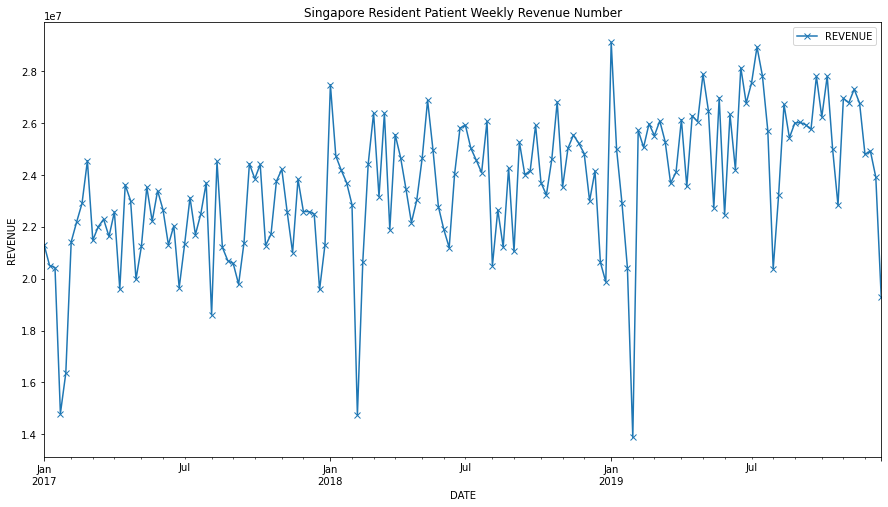

In [3]:
# Plot the time series data
series.plot(figsize=(15, 8), marker='x', title='Singapore Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
plt.show()

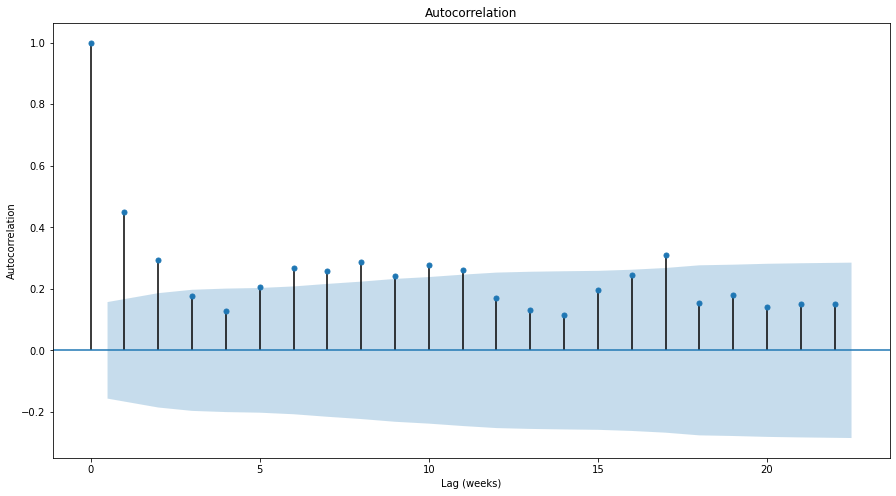

In [4]:
# Autocorrelation
#pd.plotting.autocorrelation_plot(series)
#plt.figure(figsize=(15, 8))
#plt.show()
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(series['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()
# from the picture below we choose the first 6 lags

## Start of Arima Model

In [5]:
# ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                REVENUE   No. Observations:                  156
Model:                     ARMA(2, 0)   Log Likelihood               -2509.444
Method:                       css-mle   S.D. of innovations        2341755.263
Date:                Wed, 21 Oct 2020   AIC                           5026.888
Time:                        22:10:39   BIC                           5039.087
Sample:                    01-01-2017   HQIC                          5031.843
                         - 12-22-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.357e+07   3.86e+05     61.117      0.000    2.28e+07    2.43e+07
ar.L1.REVENUE     0.4032      0.080      5.032      0.000       0.246       0.560
ar.L2.REVENUE     0.1146      0.080     

C:\Users\HCAND\anaconda3\envs\psupr\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


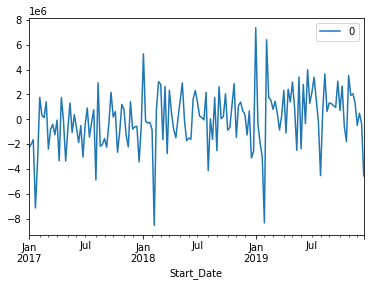

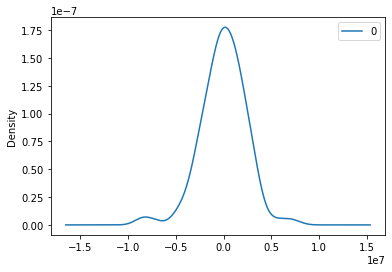

                  0
count  1.560000e+02
mean  -1.320242e+04
std    2.350893e+06
min   -8.548220e+06
25%   -1.444079e+06
50%    4.331409e+04
75%    1.399843e+06
max    7.363637e+06


In [6]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

train size is: 102
test size is: 54
predicted=23013828.112242, expected=24143221.840000
predicted=23737270.858627, expected=20622687.380000
predicted=22640845.574713, expected=19869984.190000
predicted=21951109.072812, expected=29104384.990000
predicted=25370262.745485, expected=24973426.250000
predicted=23751169.944646, expected=22893390.320000
predicted=23684011.306486, expected=20419240.970000
predicted=21620093.819664, expected=13883749.550000
predicted=18439765.759999, expected=25702742.360000
predicted=25079213.338923, expected=25055339.600000
predicted=24417946.070098, expected=25958484.000000
predicted=24229321.959472, expected=25503407.950000
predicted=21738274.048819, expected=26069068.580000
predicted=21753939.072994, expected=25263200.690000
predicted=24170256.645520, expected=23672771.560000
predicted=23581498.644679, expected=24089853.000000
predicted=23753752.140216, expected=26117240.730000
predicted=24570091.820418, expected=23546606.330000
predicted=23958431.247168, e

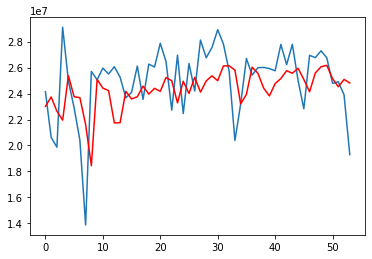

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Rolling Forecast ARIMA model
X = series.values
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
print('train size is:', size)
print('test size is:', len(X)-size)
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history,order=(6,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
error_mse = mean_squared_error(test,predictions)
error_mae = mean_absolute_error(test,predictions)
print('Test MSE: %.3f' % error_mse)
print('Test MAE: %.3f' % error_mae)

# Plot the error
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


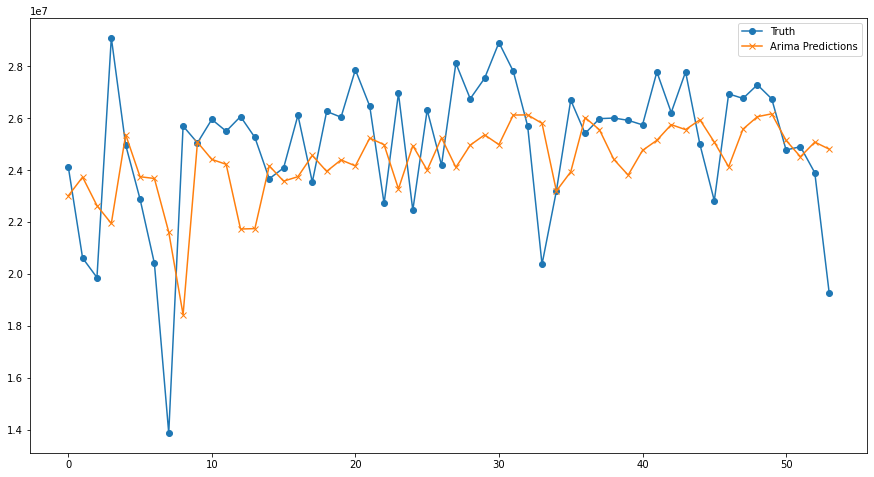

test data (actual) type is  <class 'numpy.ndarray'>
predictions data type is <class 'list'>


In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(test, label='Truth', marker='o')
ax.plot(predictions, label='Arima Predictions', marker='x')
ax.legend()
plt.show()
print('test data (actual) type is ', type(test))
print('predictions data type is', type(predictions))

In [9]:
import numpy as np
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

forecast_accuracy(predictions, test)

{'mape': 0.0933131753857731,
 'me': -641764.6482644937,
 'mae': 2206385.5035391273,
 'mpe': -0.012752516793771066,
 'mse': 8151036514775.731,
 'rmse': 2855002.0165974894}

## End of ARIMA model

## Start of Neural Net Model

In [34]:
# visualisation
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# dataset downloading
import io
import requests
import zipfile

# data processing
import pandas as pd

# models
from sklearn.model_selection import train_test_split
import tensorflow as tf

# for saving the processed dataset
import pickle

plt.style.use('seaborn-whitegrid')

print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())

Tensorflow version:  2.1.0



Update `CSV_FILE` to use the correct .csv filename. Some zip files contain multiple datasets.

In [11]:
# Note: update CSV_FILE to the .csv filename from above
CSV_FILE = 'SG_HospRevenue_2017_2019_ByWeek.csv'

df = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
df.head()

,REVENUE
Start_Date,
2017-01-01,21287436.14
2017-01-08,20501369.84
2017-01-15,20420697.12
2017-01-22,14804524.02
2017-01-29,16357977.05


### Data Exploration

1. Plot the dataset
2. Compute the min, max, etc
3. Plot the autocorrelation

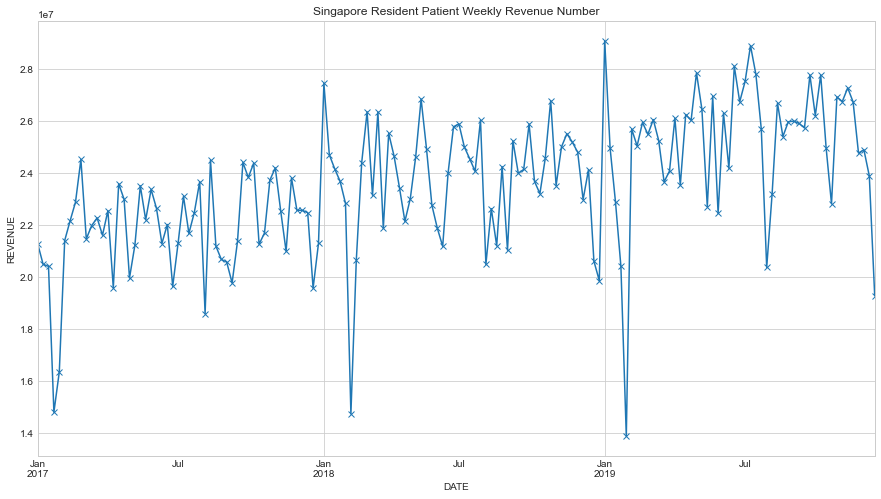

In [12]:
df['REVENUE'].plot(figsize=(15, 8), marker='x', title='Singapore Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
plt.show()

In [13]:
df['REVENUE'].describe()

count    1.560000e+02
mean     2.357092e+07
std      2.653320e+06
min      1.388375e+07
25%      2.188921e+07
50%      2.371890e+07
75%      2.552900e+07
max      2.910438e+07
Name: REVENUE, dtype: float64

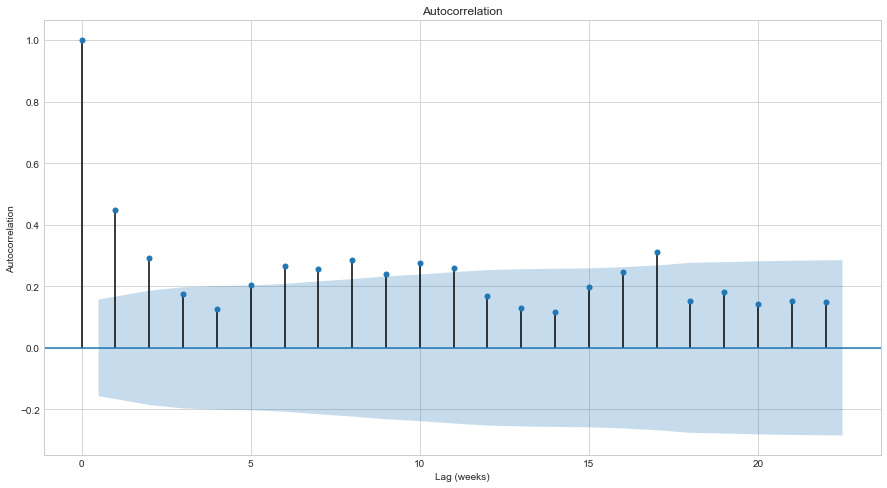

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()

In [15]:
window_size = 2 # largest number of lags above the 95% confidence band

### Windowing

1. Create shifted windows of the dataset.
2. Use this to setup our inputs and target.

In [16]:
# original dataset
df['REVENUE']

Start_Date
2017-01-01    21287436.14
2017-01-08    20501369.84
2017-01-15    20420697.12
2017-01-22    14804524.02
2017-01-29    16357977.05
                 ...     
2019-11-24    26749709.96
2019-12-01    24781045.48
2019-12-08    24907845.08
2019-12-15    23903176.17
2019-12-22    19289834.49
Name: REVENUE, Length: 156, dtype: float64

In [17]:
# shift up 1 step in time using -1
# (note the date index does not change, we'll fix that later)
df['REVENUE'].shift(-1)

Start_Date
2017-01-01    20501369.84
2017-01-08    20420697.12
2017-01-15    14804524.02
2017-01-22    16357977.05
2017-01-29    21415433.70
                 ...     
2019-11-24    24781045.48
2019-12-01    24907845.08
2019-12-08    23903176.17
2019-12-15    19289834.49
2019-12-22            NaN
Name: REVENUE, Length: 156, dtype: float64

In [18]:
# shift up in time using -2
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-2)

Start_Date
2017-01-01    20420697.12
2017-01-08    14804524.02
2017-01-15    16357977.05
2017-01-22    21415433.70
2017-01-29    22172450.06
                 ...     
2019-11-24    24907845.08
2019-12-01    23903176.17
2019-12-08    19289834.49
2019-12-15            NaN
2019-12-22            NaN
Name: REVENUE, Length: 156, dtype: float64

In [19]:
# shift up in time using -3
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-3)

Start_Date
2017-01-01    14804524.02
2017-01-08    16357977.05
2017-01-15    21415433.70
2017-01-22    22172450.06
2017-01-29    22891096.48
                 ...     
2019-11-24    23903176.17
2019-12-01    19289834.49
2019-12-08            NaN
2019-12-15            NaN
2019-12-22            NaN
Name: REVENUE, Length: 156, dtype: float64

In [20]:
# column-wise concatenation

# List comprehension, equivalent to:
# new_columns = []
# for i in range(window_size):
#    new_columns.append(df['value'].shift(-i))
new_columns = [df['REVENUE'].shift(-i) for i in range(window_size+1)]
new_column_names = [f't+{i}' for i in range(window_size+1)]

df_windowed = pd.concat(new_columns, axis=1)
df_windowed.columns = new_column_names
df_windowed

,t+0,t+1,t+2
Start_Date,,,
2017-01-01,21287436.14,20501369.84,20420697.12
2017-01-08,20501369.84,20420697.12,14804524.02
2017-01-15,20420697.12,14804524.02,16357977.05
2017-01-22,14804524.02,16357977.05,21415433.70
2017-01-29,16357977.05,21415433.70,22172450.06
...,...,...,...
2019-11-24,26749709.96,24781045.48,24907845.08
2019-12-01,24781045.48,24907845.08,23903176.17
2019-12-08,24907845.08,23903176.17,19289834.49


In [21]:
# cleanup the NaN at the bottom of the dataset
df_windowed.dropna(inplace=True)
df_windowed

,t+0,t+1,t+2
Start_Date,,,
2017-01-01,21287436.14,20501369.84,20420697.12
2017-01-08,20501369.84,20420697.12,14804524.02
2017-01-15,20420697.12,14804524.02,16357977.05
2017-01-22,14804524.02,16357977.05,21415433.70
2017-01-29,16357977.05,21415433.70,22172450.06
...,...,...,...
2019-11-10,26765677.47,27290758.23,26749709.96
2019-11-17,27290758.23,26749709.96,24781045.48
2019-11-24,26749709.96,24781045.48,24907845.08


In [22]:
# Formulate our problem

df_windowed.columns

Index(['t+0', 't+1', 't+2'], dtype='object')

In [23]:
# the target we want to predict (lowercase y is a convention for a vector)
y = df_windowed['t+2']

# the input data (uppercase X is a convention for a matrix)
X = df_windowed.drop(columns=['t+2'])

X.shape, y.shape

((154, 2), (154,))

### Neural Network

1. Create a neural network using Tensorflow-Keras
2. Split the dataset into training and test sets
3. Train the neural network using the training set.
4. Evaluate the neural network using the test set.



In [24]:
# https://www.tensorflow.org/guide/keras/overview
# Create a simple Neural Network with 2 Dense Layers
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(2,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103, 2), (51, 2), (103,), (51,))

In [26]:
# Note that the data is shuffled in time
# This is okay because we already preserved the history!
#
# If this bothers you, you can use train_test_split(X, y, shuffle=False)
# It does affect how the Neural Network is initialised, but since we
# will be go through the dataset multiple rounds, it doesn't really matter.
#
# It may matter if your dataset is huge, because the Neural Network training
# gets more chances see the older data. 
X_train

,t+0,t+1
Start_Date,,
2017-01-01,21287436.14,20501369.84
2017-01-08,20501369.84,20420697.12
2017-01-15,20420697.12,14804524.02
2017-01-22,14804524.02,16357977.05
2017-01-29,16357977.05,21415433.70
...,...,...
2018-11-18,25525796.76,25205250.15
2018-11-25,25205250.15,24812923.31
2018-12-02,24812923.31,22991661.18


In [27]:
# What matters is that each row of X_train and each row of y_train
# are for the same quarter!
y_train

Start_Date
2017-01-01    20420697.12
2017-01-08    14804524.02
2017-01-15    16357977.05
2017-01-22    21415433.70
2017-01-29    22172450.06
                 ...     
2018-11-18    24812923.31
2018-11-25    22991661.18
2018-12-02    24143221.84
2018-12-09    20622687.38
2018-12-16    19869984.19
Name: t+2, Length: 103, dtype: float64

In [28]:
# train!
# Note: if you have more data, you can split the dataset 3 ways:
#  train, validation, test
# And then use the validation set (e.g. X_val, y_val) in validation_data

model.compile(optimizer='Adam', loss='mse', metrics=['mape'])
history = model.fit(X_train, y_train, batch_size=8, epochs=250,
                    validation_data=(X_test, y_test))

Train on 103 samples, validate on 51 samples
Epoch 1/250
103/103 [==============================] - 1s 6ms/sample - loss: 88676670445150.4531 - mape: 39.9007 - val_loss: 78520837924582.9062 - val_mape: 32.7303
Epoch 2/250
103/103 [==============================] - 0s 301us/sample - loss: 45442284831197.2031 - mape: 27.5346 - val_loss: 37958631411149.8047 - val_mape: 21.6938
Epoch 3/250
103/103 [==============================] - 0s 243us/sample - loss: 20361426944477.2031 - mape: 17.2744 - val_loss: 17360958084437.3340 - val_mape: 13.8413
Epoch 4/250
103/103 [==============================] - 0s 243us/sample - loss: 9061633095182.9121 - mape: 10.4085 - val_loss: 10218883272784.3145 - val_mape: 9.9265
Epoch 5/250
103/103 [==============================] - 0s 271us/sample - loss: 6172041113560.2334 - mape: 8.4963 - val_loss: 9421806591839.3730 - val_mape: 8.9953
Epoch 6/250
103/103 [==============================] - 0s 243us/sample - loss: 5793020575107.7285 - mape: 8.3396 - val_loss: 948

Epoch 51/250
103/103 [==============================] - 0s 248us/sample - loss: 5491591681630.4463 - mape: 8.0527 - val_loss: 9004642421579.2949 - val_mape: 8.8114
Epoch 52/250
103/103 [==============================] - 0s 246us/sample - loss: 5475535737030.8350 - mape: 8.0957 - val_loss: 9010153397790.1172 - val_mape: 8.8132
Epoch 53/250
103/103 [==============================] - 0s 252us/sample - loss: 5455129483482.7178 - mape: 8.0331 - val_loss: 8985130868896.6270 - val_mape: 8.7972
Epoch 54/250
103/103 [==============================] - 0s 253us/sample - loss: 5491579563196.8936 - mape: 7.9894 - val_loss: 9003130128263.5293 - val_mape: 8.8023
Epoch 55/250
103/103 [==============================] - 0s 262us/sample - loss: 5472490567978.2520 - mape: 8.0422 - val_loss: 9000022920011.2949 - val_mape: 8.8115
Epoch 56/250
103/103 [==============================] - 0s 247us/sample - loss: 5509287361128.3887 - mape: 8.0238 - val_loss: 8988275311877.0195 - val_mape: 8.8008
Epoch 57/250
103

Epoch 101/250
103/103 [==============================] - 0s 243us/sample - loss: 5421017155603.8838 - mape: 7.9609 - val_loss: 8893992528875.9219 - val_mape: 8.8017
Epoch 102/250
103/103 [==============================] - 0s 242us/sample - loss: 5416675239081.0098 - mape: 8.0148 - val_loss: 8887106612525.1758 - val_mape: 8.7807
Epoch 103/250
103/103 [==============================] - 0s 252us/sample - loss: 5410779760500.8154 - mape: 8.0274 - val_loss: 8881216082642.8242 - val_mape: 8.7779
Epoch 104/250
103/103 [==============================] - 0s 249us/sample - loss: 5414579128021.7480 - mape: 7.9870 - val_loss: 8850565651034.3535 - val_mape: 8.7836
Epoch 105/250
103/103 [==============================] - 0s 249us/sample - loss: 5427031120726.9902 - mape: 7.9869 - val_loss: 8848477329689.0977 - val_mape: 8.7760
Epoch 106/250
103/103 [==============================] - 0s 252us/sample - loss: 5405225702847.3779 - mape: 8.0288 - val_loss: 8874413836488.7852 - val_mape: 8.7818
Epoch 107/

103/103 [==============================] - 0s 248us/sample - loss: 5399535077077.7480 - mape: 7.9773 - val_loss: 8717258261765.0205 - val_mape: 8.7608
Epoch 151/250
103/103 [==============================] - 0s 243us/sample - loss: 5359279632344.2334 - mape: 7.9584 - val_loss: 8748430945902.4316 - val_mape: 8.7484
Epoch 152/250
103/103 [==============================] - 0s 253us/sample - loss: 5364946625705.0098 - mape: 8.0205 - val_loss: 8739072065857.2549 - val_mape: 8.7461
Epoch 153/250
103/103 [==============================] - 0s 239us/sample - loss: 5373156544392.6992 - mape: 7.9063 - val_loss: 8748115427328.0000 - val_mape: 8.7848
Epoch 154/250
103/103 [==============================] - 0s 248us/sample - loss: 5375221652470.0576 - mape: 8.0046 - val_loss: 8717493924080.9424 - val_mape: 8.7391
Epoch 155/250
103/103 [==============================] - 0s 238us/sample - loss: 5339155718064.4658 - mape: 7.9935 - val_loss: 8730739207147.9219 - val_mape: 8.7439
Epoch 156/250
103/103 [=

Epoch 200/250
103/103 [==============================] - 0s 243us/sample - loss: 5290702273287.4570 - mape: 7.9155 - val_loss: 8677489721665.2549 - val_mape: 8.7572
Epoch 201/250
103/103 [==============================] - 0s 243us/sample - loss: 5338100537562.7178 - mape: 7.8746 - val_loss: 8678440821217.8828 - val_mape: 8.7503
Epoch 202/250
103/103 [==============================] - 0s 243us/sample - loss: 5448287807587.4170 - mape: 8.1367 - val_loss: 8696177967425.2549 - val_mape: 8.7443
Epoch 203/250
103/103 [==============================] - 0s 243us/sample - loss: 5298915718193.7090 - mape: 7.9427 - val_loss: 8686008240007.5293 - val_mape: 8.7998
Epoch 204/250
103/103 [==============================] - 0s 253us/sample - loss: 5334348058186.5635 - mape: 7.9642 - val_loss: 8652037985942.5879 - val_mape: 8.7178
Epoch 205/250
103/103 [==============================] - 0s 243us/sample - loss: 5307753032733.8252 - mape: 7.9251 - val_loss: 8663351637815.2158 - val_mape: 8.7290
Epoch 206/

Epoch 250/250
103/103 [==============================] - 0s 247us/sample - loss: 5263269328717.0488 - mape: 7.9484 - val_loss: 8598259185463.2158 - val_mape: 8.7112


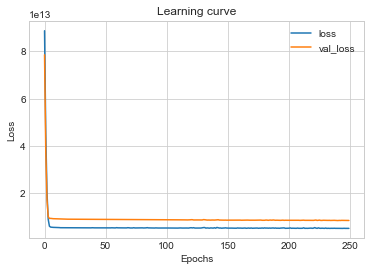

In [29]:
# Check for overfitting, which is when val_loss starts to go up but
# loss stays decreases or stays constant.

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [35]:
model.save('model_sg_revenue_prediction.h5')

In [36]:
# Get a prediction from our model for our data and plot it against the truth

y_pred = model.predict(X)

df_pred = pd.DataFrame(index=X.index, data={'predictions': y_pred.ravel()})
df_pred

,predictions
Start_Date,
2017-01-01,20537648.0
2017-01-08,20261516.0
2017-01-15,17844040.0
2017-01-22,15780465.0
2017-01-29,19818448.0
...,...
2019-11-10,26902010.0
2019-11-17,26662274.0
2019-11-24,25415026.0


In [37]:
type(y_pred)

numpy.ndarray

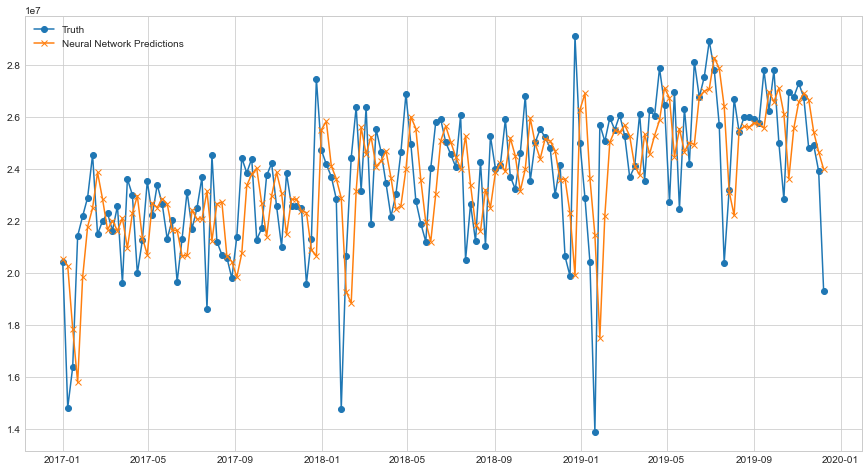

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y, label='Truth', marker='o')
ax.plot(df_pred, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()

In [39]:
full_id_with_y_and_pred = pd.concat([X,y,df_pred],axis=1)
full_id_with_y_and_pred.to_csv('full_sg_revenue_with_y_and_pred.csv')

In [40]:
# Get a prediction from our model for our data and plot it against the truth

y_pred_test = model.predict(X_test)

df_pred_test = pd.DataFrame(index=X_test.index, data={'predictions': y_pred_test.ravel()})
df_pred_test

,predictions
Start_Date,
2018-12-23,19902598.0
2018-12-30,26277372.0
2019-01-06,26898954.0
2019-01-13,23635684.0
2019-01-20,21452204.0
2019-01-27,17494456.0
2019-02-03,22187184.0
2019-02-10,25012552.0
2019-02-17,25476444.0


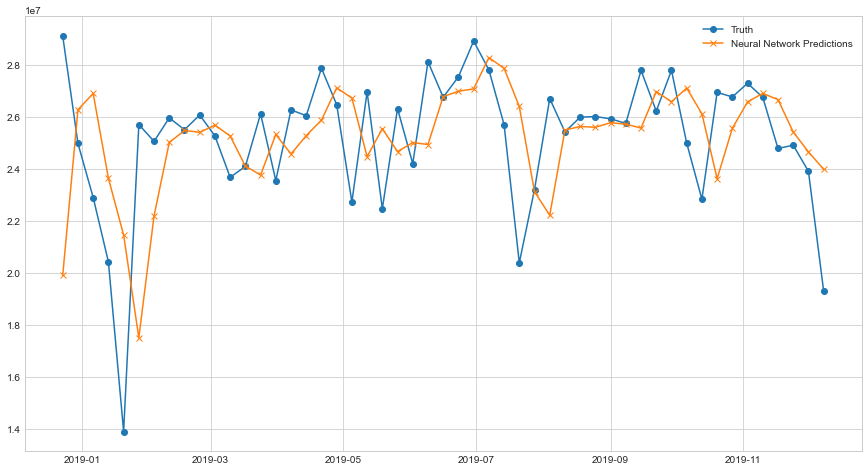

type of y_test is  <class 'pandas.core.series.Series'>
type of df_pred_test is  <class 'pandas.core.frame.DataFrame'>


In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, label='Truth', marker='o')
ax.plot(df_pred_test, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()
print('type of y_test is ', type(y_test))
print('type of df_pred_test is ', type(df_pred_test))

In [42]:
forecast_accuracy(df_pred_test["predictions"].to_numpy(), y_test)

{'mape': 0.08711194339488464,
 'me': -26311.134705882447,
 'mae': 2038846.95,
 'mpe': 0.010727621428671955,
 'mse': 8598260400693.337,
 'rmse': 2932279.0455025486}

In [ ]:
#{'mape': 0.42619692749642285,
# 'me': -228466.9305391664,
# 'mae': 753582.7795691834,
# 'mpe': 0.1954761148314077,
# 'mse': 946360530436.5908,
# 'rmse': 972810.6344179173}